Differential equation:
\begin{equation}
  \frac{d^2x}{dt^2} + \mu (1-x^2) \frac{dx}{dt} + x = 0
\end{equation}

where $x$ is the position coordinate—which is a function of the time $t$, and $\mu$ is a scalar parameter indicating the nonlinearity and the strength of the damping. 

After transformation:

\begin{equation}
  \begin{cases}
    \frac{dx}{dt} = y \\
    \frac{dy}{dt} = \mu (1-x^2) y - x
  \end{cases}
\end{equation}

In [1]:
# import libs
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math

In [2]:
# Initial conditions
xy0 = [1, 1] 

# Parameters of the system
t_span = (0, 20)
t = np.arange(t_span[0], t_span[1], 0.01)

def f(t, state, mu):
  x, y = state # Unpack the state vector
    
  # Derivatives
  return [y,
          mu * (1 - x * x) * y - x]

results = []

for mu in np.arange(1, 10, 2):
  xy = integrate.solve_ivp(f, t_span, xy0, args=[mu], t_eval=t)
  results.append({'mu': mu, 'xy': xy})

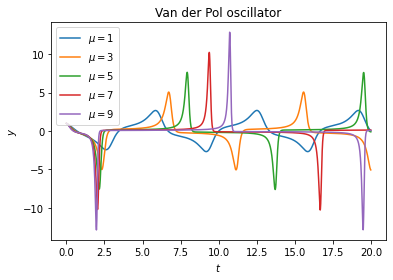

In [3]:
for result in results:
    plt.plot(t, result['xy'].y[1, :], label=r"$\mu = %s$" % result['mu'])
plt.xlabel(r"$t$")
plt.ylabel(r"$y$")
plt.title("Van der Pol oscillator")
plt.legend()

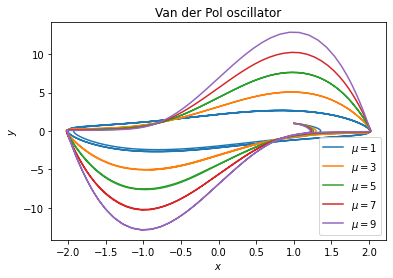

In [4]:
for result in results:
    plt.plot(result['xy'].y[0, :], result['xy'].y[1, :], label=r"$\mu = %s$" % result['mu'])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Van der Pol oscillator")
plt.legend()